In [1]:
import json
import jsonschema
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
def create_add(df, col):
    return df.apply(
        lambda row: row[col]-df[
            df["date"]==row["date"] - pd.Timedelta(1, unit='D')
        ][col].max(),
        axis=1
    )

In [8]:
dfs = []
for month in ["2020.08","2020.09","2020.10","2020.11","2020.12","2021.01"]:
    with open("data/kpi_hu/{}.json".format(month), 'r') as myfile:
        data_json = json.load(myfile)
        dfs.append(pd.json_normalize(data_json.values()))
df = pd.concat(dfs)
reduced_df = df[["update","tests","infected_pest","infected_other"]].copy()
reduced_df["update"] = pd.to_datetime(reduced_df["update"], format='%Y.%m.%d. %H:%M')
reduced_df["date"] = reduced_df["update"].dt.date
reduced_df["infected"] = reduced_df["infected_pest"]+reduced_df["infected_other"]
reduced_df["add.tests"] = create_add(reduced_df, "tests")
reduced_df["add.infected"] = create_add(reduced_df, "infected")
reduced_df["add.infected/add.tests"] = reduced_df["add.infected"] / reduced_df["add.tests"] * 100
reduced_df.tail()

,update,tests,infected_pest,infected_other,date,infected,add.tests,add.infected,add.infected/add.tests
27,2021-01-27 08:52:00,3084716,18118,84969,2021-01-27,103087,17053.0,-996.0,-5.840615
28,2021-01-28 08:22:00,3097809,17947,84209,2021-01-28,102156,13093.0,-931.0,-7.110670
29,2021-01-29 08:56:00,3116784,16881,80871,2021-01-29,97752,18975.0,-4404.0,-23.209486
30,2021-01-30 08:59:00,3138146,16208,78053,2021-01-30,94261,21362.0,-3491.0,-16.342103
31,2021-01-31 09:11:00,3158288,15747,76347,2021-01-31,92094,20142.0,-2167.0,-10.758614


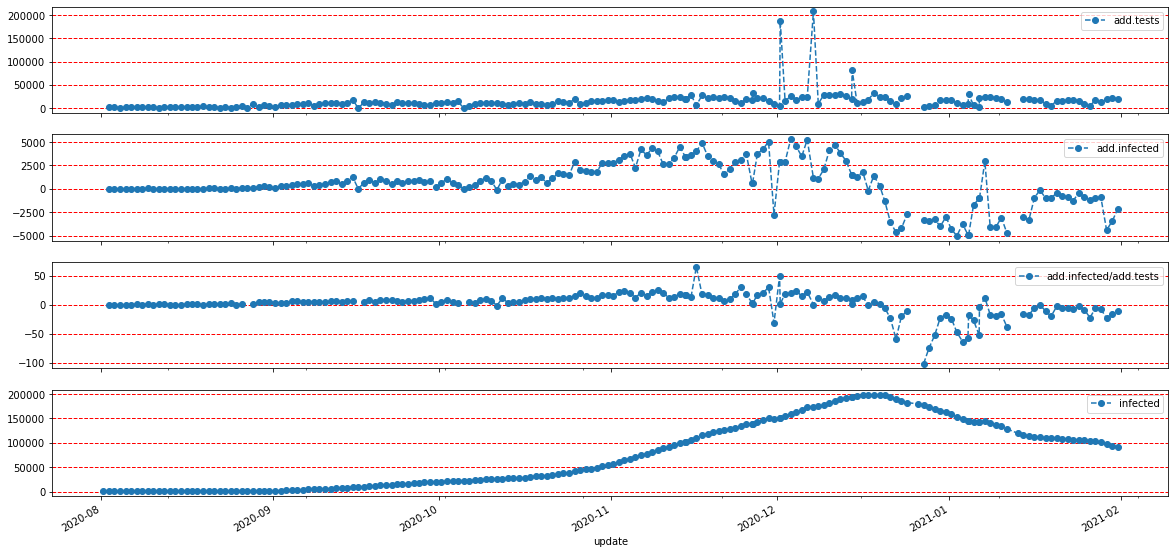

In [9]:
fig, ax = plt.subplots(nrows=4,figsize=(20,10),sharex=True)
#ax[0].set_ylim(0,2100)
#ax[1].set_ylim(1,100)
#ax[1].set_yscale("log")
#ax[2].set_ylim(0,10)
#ax[2].set_yscale("log")
reduced_df.plot(x="update", y="add.tests", ax=ax[0], label="add.tests", style="o--")
reduced_df.plot(x="update", y="add.infected", ax=ax[1], label="add.infected", style="o--")
reduced_df.plot(x="update", y="add.infected/add.tests", ax=ax[2], label="add.infected/add.tests", style="o--")
reduced_df.plot(x="update", y="infected", ax=ax[3], label="infected", style="o--")
ax[0].grid(True, which="both", axis="y", color='r', linestyle='--', linewidth=1)
ax[1].grid(True, which="both", axis="y", color='r', linestyle='--', linewidth=1)
ax[2].grid(True, which="both", axis="y", color='r', linestyle='--', linewidth=1)
ax[3].grid(True, which="both", axis="y", color='r', linestyle='--', linewidth=1)
plt.show()